In [7]:
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
from scipy import integrate
from matplotlib import pyplot as plt

In [8]:
T_data,x1_data,y1_data=np.array(pd.read_excel('data.xlsx')).T

In [9]:
#Feed quality
"""
enthalpy taken reference to feed
"""
######################################################
T_feed=25+273.15
T_plate=112.958+273.15
######################################################
#Enthalpy data
def Cp_n(T):
    return (83.877+5.6628e-1*T-1.7208e-03*T**2+2.2780e-06*T**3)/1000 #kJ/(mol*K)
def Cp_iso(T):
    return (-368.2900757+9.044231228*T-0.06030195*T**2+0.000171544*T**3-1.68717e-07*T**4)/1000 #kJ/(mol*K)
def latent_n(T):
    return 63.024*(1-T/562.93)**0.318 #kJ/mol
def latent_iso(T):
    return 76.19*(1-T/547.73)**0.505 #kJ/mol
#####################################################
def enthalpy(T1,T2,x1,y1,state):
    if (state=="l"):
        enthalpy_n=integrate.quad(Cp_n,T1,T2)[0]
        enthalpy_iso=integrate.quad(Cp_iso,T1,T2)[0]
        return x1*enthalpy_iso+(1-x1)*enthalpy_n
    if (state=="v"):
        enthalpy_n=integrate.quad(Cp_n,T1,T2)[0]+latent_n(T2)
        enthalpy_iso=integrate.quad(Cp_iso,T1,T2)[0]+latent_iso(T2)
        return y1*enthalpy_iso+(1-y1)*enthalpy_n
def calc_q(T_feed,T_plate,x1_p,y1_p):
    enthalpy_vap=enthalpy(T_feed,T_plate,x1_p,y1_p,"v")
    enthalpy_liq=enthalpy(T_feed,T_plate,x1_p,y1_p,"l")
    return enthalpy_vap/(enthalpy_vap-enthalpy_liq)
#####################################################

print(calc_q(T_feed,T_plate,0.4,0.48435))

1.3906847587268232


<IPython.core.display.Javascript object>


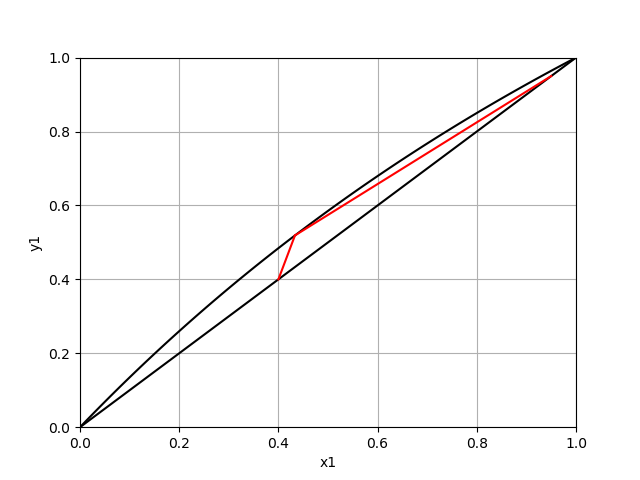

R= [5.04641982]


In [14]:
#R_min and R
"""
"""
#####################################################
y1_dist=0.95
x1_bot=0.05
R_fact=1.15

T_feed=25+273.15
x1_feed=0.4

T_plate=112.958+273.15
x1_plate=0.4
y1_plate=0.48435
#####################################################
#feed and VLE intersection
q=calc_q(T_feed,T_plate,x1_plate,y1_plate)
for i in range(0,len(x1_data)-1):
    xi,xf=x1_data[i],x1_data[i+1]
    yi,yf=y1_data[i],y1_data[i+1]
    def fn(x):
        return (-q/(1-q))*x+x1_feed/(1-q)-((yf-yi)/(xf-xi))*(x-xi)-yi
    x=fsolve(fn,(xi+xf)/2)
    if ((x>xi) and (x<xf)) or (x==xi) or (x==xf):
        x_feedplate=x
        y_feedplate=((yf-yi)/(xf-xi))*(x-xi)+yi
        break
#####################################################
#reflux calc
L_over_V=(y_feedplate-y1_dist)/(x_feedplate-y1_dist)
R=L_over_V/(1-L_over_V)
#####################################################
#plot
%matplotlib notebook
plt.figure(0)
plt.xlabel("x1")
plt.ylabel("y1")
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid(True)

plt.plot(x1_data,y1_data,color="black",label="VLE")
plt.plot([0,1],[0,1],color="black")
plt.plot([x_feedplate,x1_feed],[y_feedplate,x1_feed],color="r")
plt.plot([x_feedplate,y1_dist],[y_feedplate,y1_dist],color="r")
#####################################################
#print
print("R=",R)